# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 8
suf = 'DOC'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_8DOC_modisa_3.csv
out_filename: df_chl_out_8DOC_modisa_4.csv


,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.000000,NaN,0.132783,-0.876858,-0.017698,NaN,520.4050
3888,11089,2002-11-01,13.679406,4.337844,0.000106,65.099156,14.269219,0.000057,-11.122000,0.003679,28.969813,0.150789,-0.821630,0.025481,-1.593784,822.7430
3908,34710,2002-11-01,12.432687,11.684344,0.000123,63.145031,17.038563,0.000064,0.757312,0.001698,28.970219,0.388257,-0.410881,0.064084,-1.193250,584.0640
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.000000,NaN,0.135089,-0.869380,0.002306,-2.637141,545.1970
4147,11089,2002-11-09,19.677781,-6.951906,0.000126,64.193281,14.220969,0.000065,-17.539250,0.003868,28.742188,0.201879,-0.694909,0.051090,-1.291664,858.3870
4149,15707,2002-11-09,23.783812,-15.661781,0.000150,67.022625,12.926656,0.000075,-12.393500,1000.000000,NaN,0.153961,-0.812589,-0.004697,NaN,580.7750
4167,34710,2002-11-09,26.598219,25.294281,0.000126,63.000156,17.952812,0.000065,-2.723375,0.001878,28.255188,0.501054,-0.300115,0.112797,-0.947702,513.0270
4173,34721,2002-11-09,18.274406,12.886094,0.000124,68.182750,12.879281,0.000063,8.236687,0.001813,29.291313,0.150119,-0.823564,0.002713,-2.566549,457.1560
4426,34710,2002-11-17,51.033437,42.687531,0.000152,62.227781,20.239094,0.000075,-25.647250,0.001815,27.549469,0.480306,-0.318482,-0.020748,NaN,327.3360


In [4]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [5]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.000000,NaN,0.132783,-0.876858,-0.017698,NaN,520.405,-0.016661
3888,11089,2002-11-01,13.679406,4.337844,0.000106,65.099156,14.269219,0.000057,-11.122000,0.003679,28.969813,0.150789,-0.821630,0.025481,-1.593784,822.743,0.021123
3908,34710,2002-11-01,12.432687,11.684344,0.000123,63.145031,17.038563,0.000064,0.757312,0.001698,28.970219,0.388257,-0.410881,0.064084,-1.193250,584.064,0.020632
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.000000,NaN,0.135089,-0.869380,0.002306,-2.637141,545.197,0.002134
4147,11089,2002-11-09,19.677781,-6.951906,0.000126,64.193281,14.220969,0.000065,-17.539250,0.003868,28.742188,0.201879,-0.694909,0.051090,-1.291664,858.387,0.031634


In [6]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    683.000000
mean      -0.032549
std        0.166130
min       -1.971716
25%       -0.033506
50%       -0.005183
75%        0.021785
max        0.120403
Name: chlor_a_logE_rate, dtype: float64

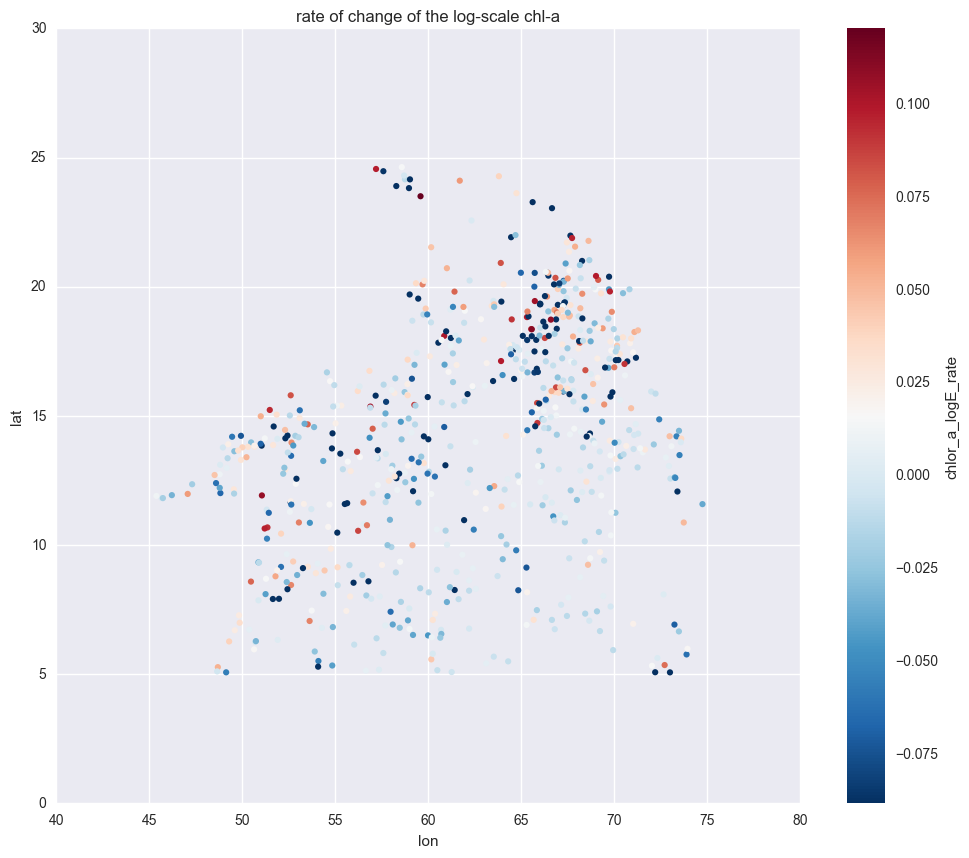

In [7]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

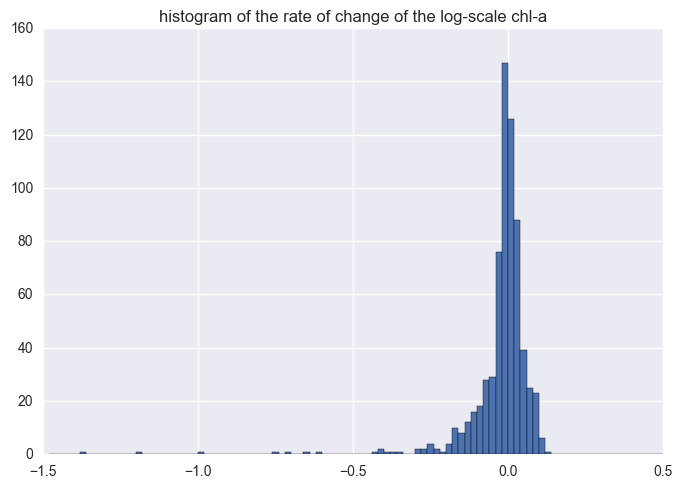

In [8]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

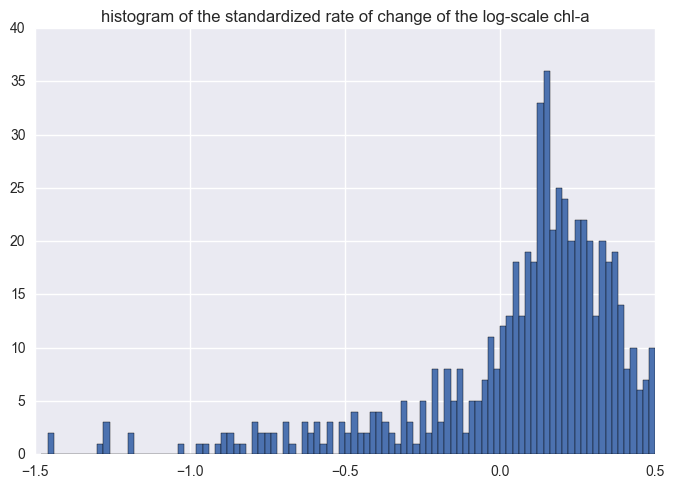

In [9]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [22]:
(np.log(0.135089)-np.log(0.132783))   / freq

0.0021522004602332889

In [11]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:10206, time:2002-11-09"
# (0.135089- 0.132783) / (freq*0.135089)    == 0.0021337784719703077
#########
# Val 2:
# id:10206, time:2002-11-09"
# (np.log(0.135089)-np.log(0.132783))   / freq == 0.0021522004602332889 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.0,NaN,0.132783,-0.876858,-0.017698,NaN,520.405,-0.016661
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.0,NaN,0.135089,-0.869380,0.002306,-2.637141,545.197,0.002134
5440,10206,2002-12-19,9.617437,4.556469,0.004192,64.896875,12.434812,0.001140,-8.368125,1000.0,NaN,0.156649,-0.805072,0.019815,-1.703006,795.611,0.015812
5699,10206,2002-12-27,12.251438,-1.765500,0.001212,64.271031,12.549094,0.000417,-11.493313,1000.0,NaN,0.163432,-0.786663,0.006783,-2.168578,866.410,0.005188
5958,10206,2003-01-04,12.856875,-5.715375,0.002190,63.550156,12.280437,0.000691,-11.053437,1000.0,NaN,0.293834,-0.531898,0.130402,-0.884716,940.296,0.055474


In [12]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.0,NaN,0.132783,-0.876858,-0.017698,NaN,520.405,-0.016661
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.0,NaN,0.135089,-0.869380,0.002306,-2.637141,545.197,0.002134
5440,10206,2002-12-19,9.617437,4.556469,0.004192,64.896875,12.434812,0.001140,-8.368125,1000.0,NaN,0.156649,-0.805072,0.019815,-1.703006,795.611,0.015812
5699,10206,2002-12-27,12.251438,-1.765500,0.001212,64.271031,12.549094,0.000417,-11.493313,1000.0,NaN,0.163432,-0.786663,0.006783,-2.168578,866.410,0.005188
5958,10206,2003-01-04,12.856875,-5.715375,0.002190,63.550156,12.280437,0.000691,-11.053437,1000.0,NaN,0.293834,-0.531898,0.130402,-0.884716,940.296,0.055474


In [13]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_8DOC_modisa_4.csv


,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.0,NaN,0.132783,-0.876858,-0.017698,NaN,520.405,-0.016661
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.0,NaN,0.135089,-0.869380,0.002306,-2.637141,545.197,0.002134
5440,10206,2002-12-19,9.617437,4.556469,0.004192,64.896875,12.434812,0.001140,-8.368125,1000.0,NaN,0.156649,-0.805072,0.019815,-1.703006,795.611,0.015812
5699,10206,2002-12-27,12.251438,-1.765500,0.001212,64.271031,12.549094,0.000417,-11.493313,1000.0,NaN,0.163432,-0.786663,0.006783,-2.168578,866.410,0.005188
5958,10206,2003-01-04,12.856875,-5.715375,0.002190,63.550156,12.280437,0.000691,-11.053437,1000.0,NaN,0.293834,-0.531898,0.130402,-0.884716,940.296,0.055474


In [14]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 53 :


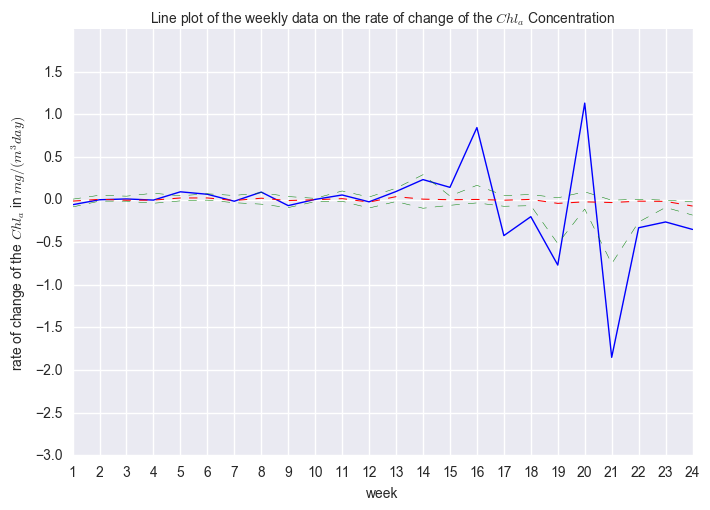

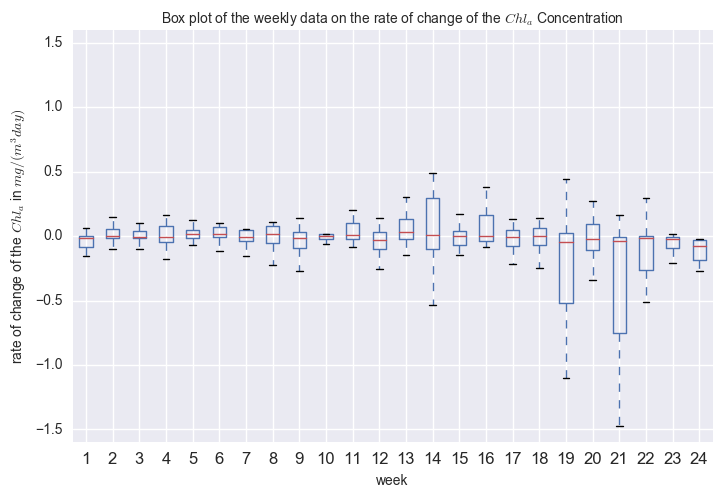

In [15]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

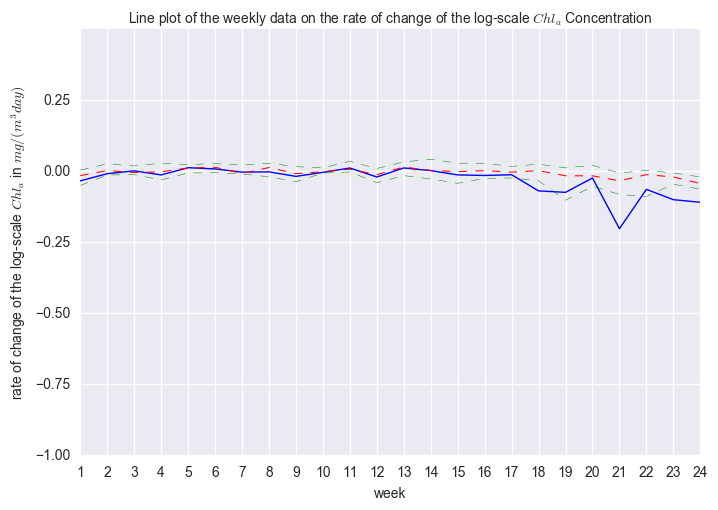

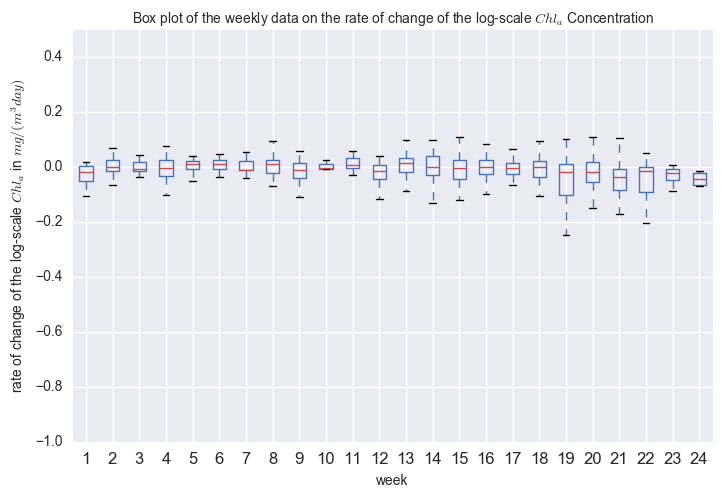

In [16]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [17]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    108.000000
mean      -0.012186
std        0.115592
min       -0.372265
25%       -0.038421
50%       -0.000576
75%        0.041588
max        0.345365
Name: chl_rate, dtype: float64


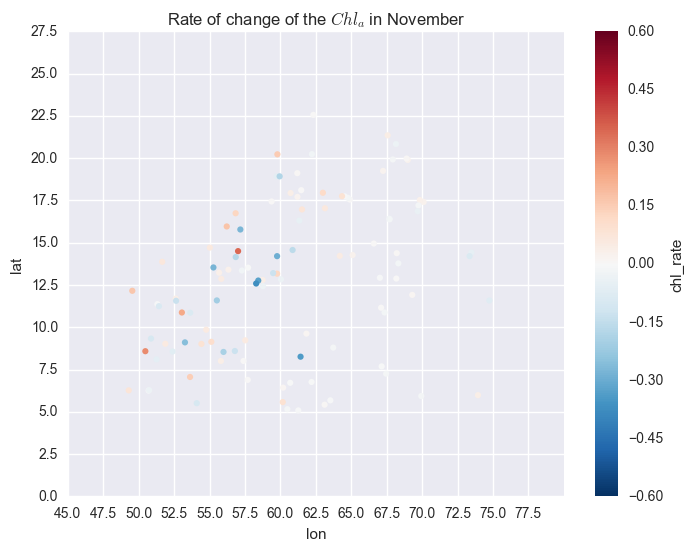



 summary of the Chl_rate 
 count    109.000000
mean       0.028671
std        0.323727
min       -1.444104
25%       -0.044968
50%        0.005496
75%        0.062134
max        1.688675
Name: chl_rate, dtype: float64


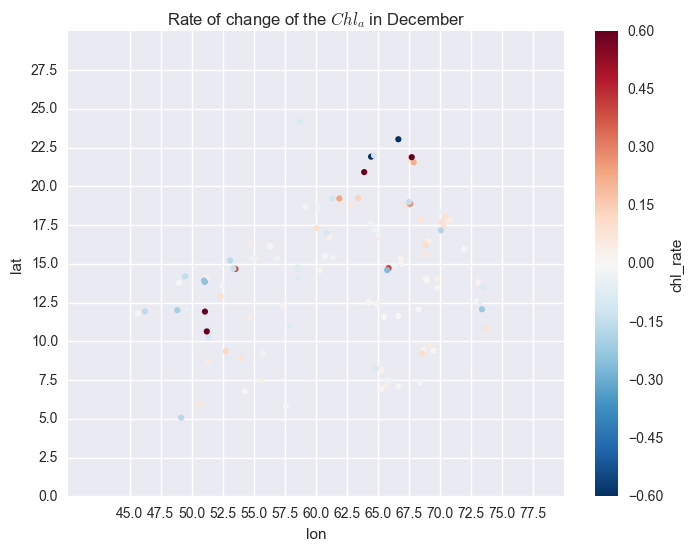



 summary of the Chl_rate 
 count    145.000000
mean       0.130195
std        0.598494
min       -0.535257
25%       -0.044103
50%        0.006622
75%        0.132662
max        4.694123
Name: chl_rate, dtype: float64


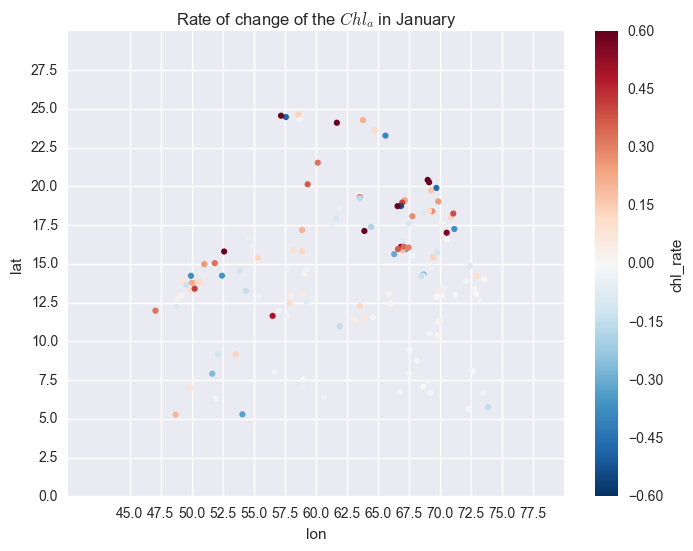



 summary of the Chl_rate 
 count    158.000000
mean      -0.165618
std        4.219963
min      -28.683290
25%       -0.118069
50%       -0.005606
75%        0.063794
max       35.780121
Name: chl_rate, dtype: float64


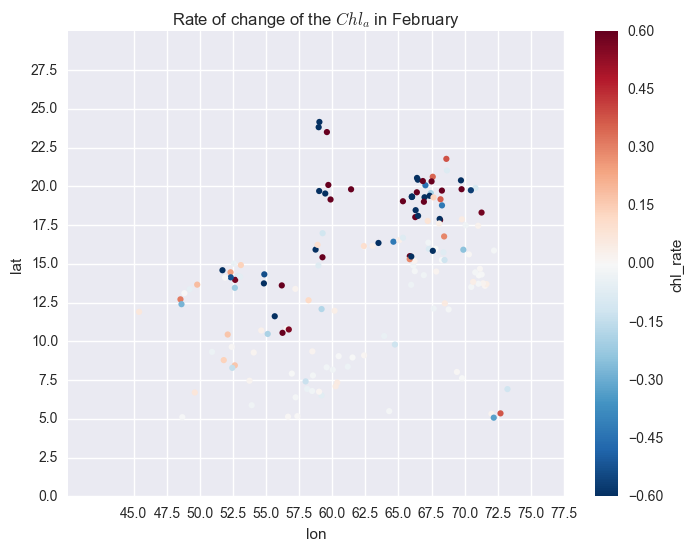



 summary of the Chl_rate 
 count    163.000000
mean      -0.255519
std        3.027861
min      -17.483995
25%       -0.202936
50%       -0.025407
75%        0.001883
max       16.557178
Name: chl_rate, dtype: float64


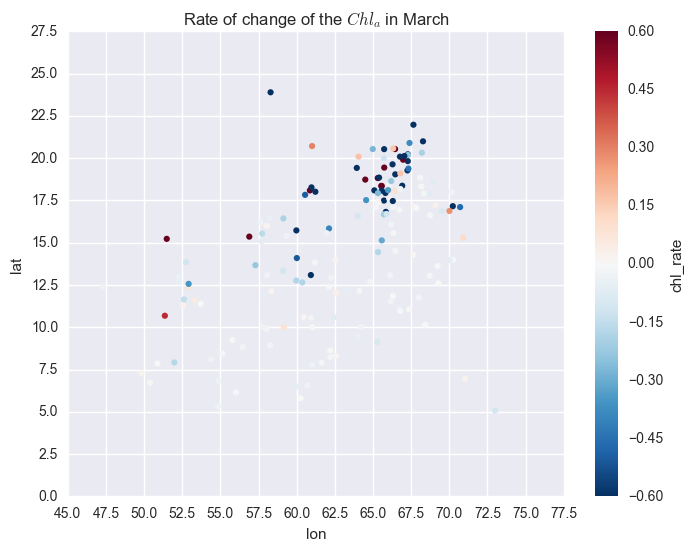

In [18]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [19]:
print("test")

test
